# Investigating NETFLIX Movies & Stars
## An Exploratory Data Analysis

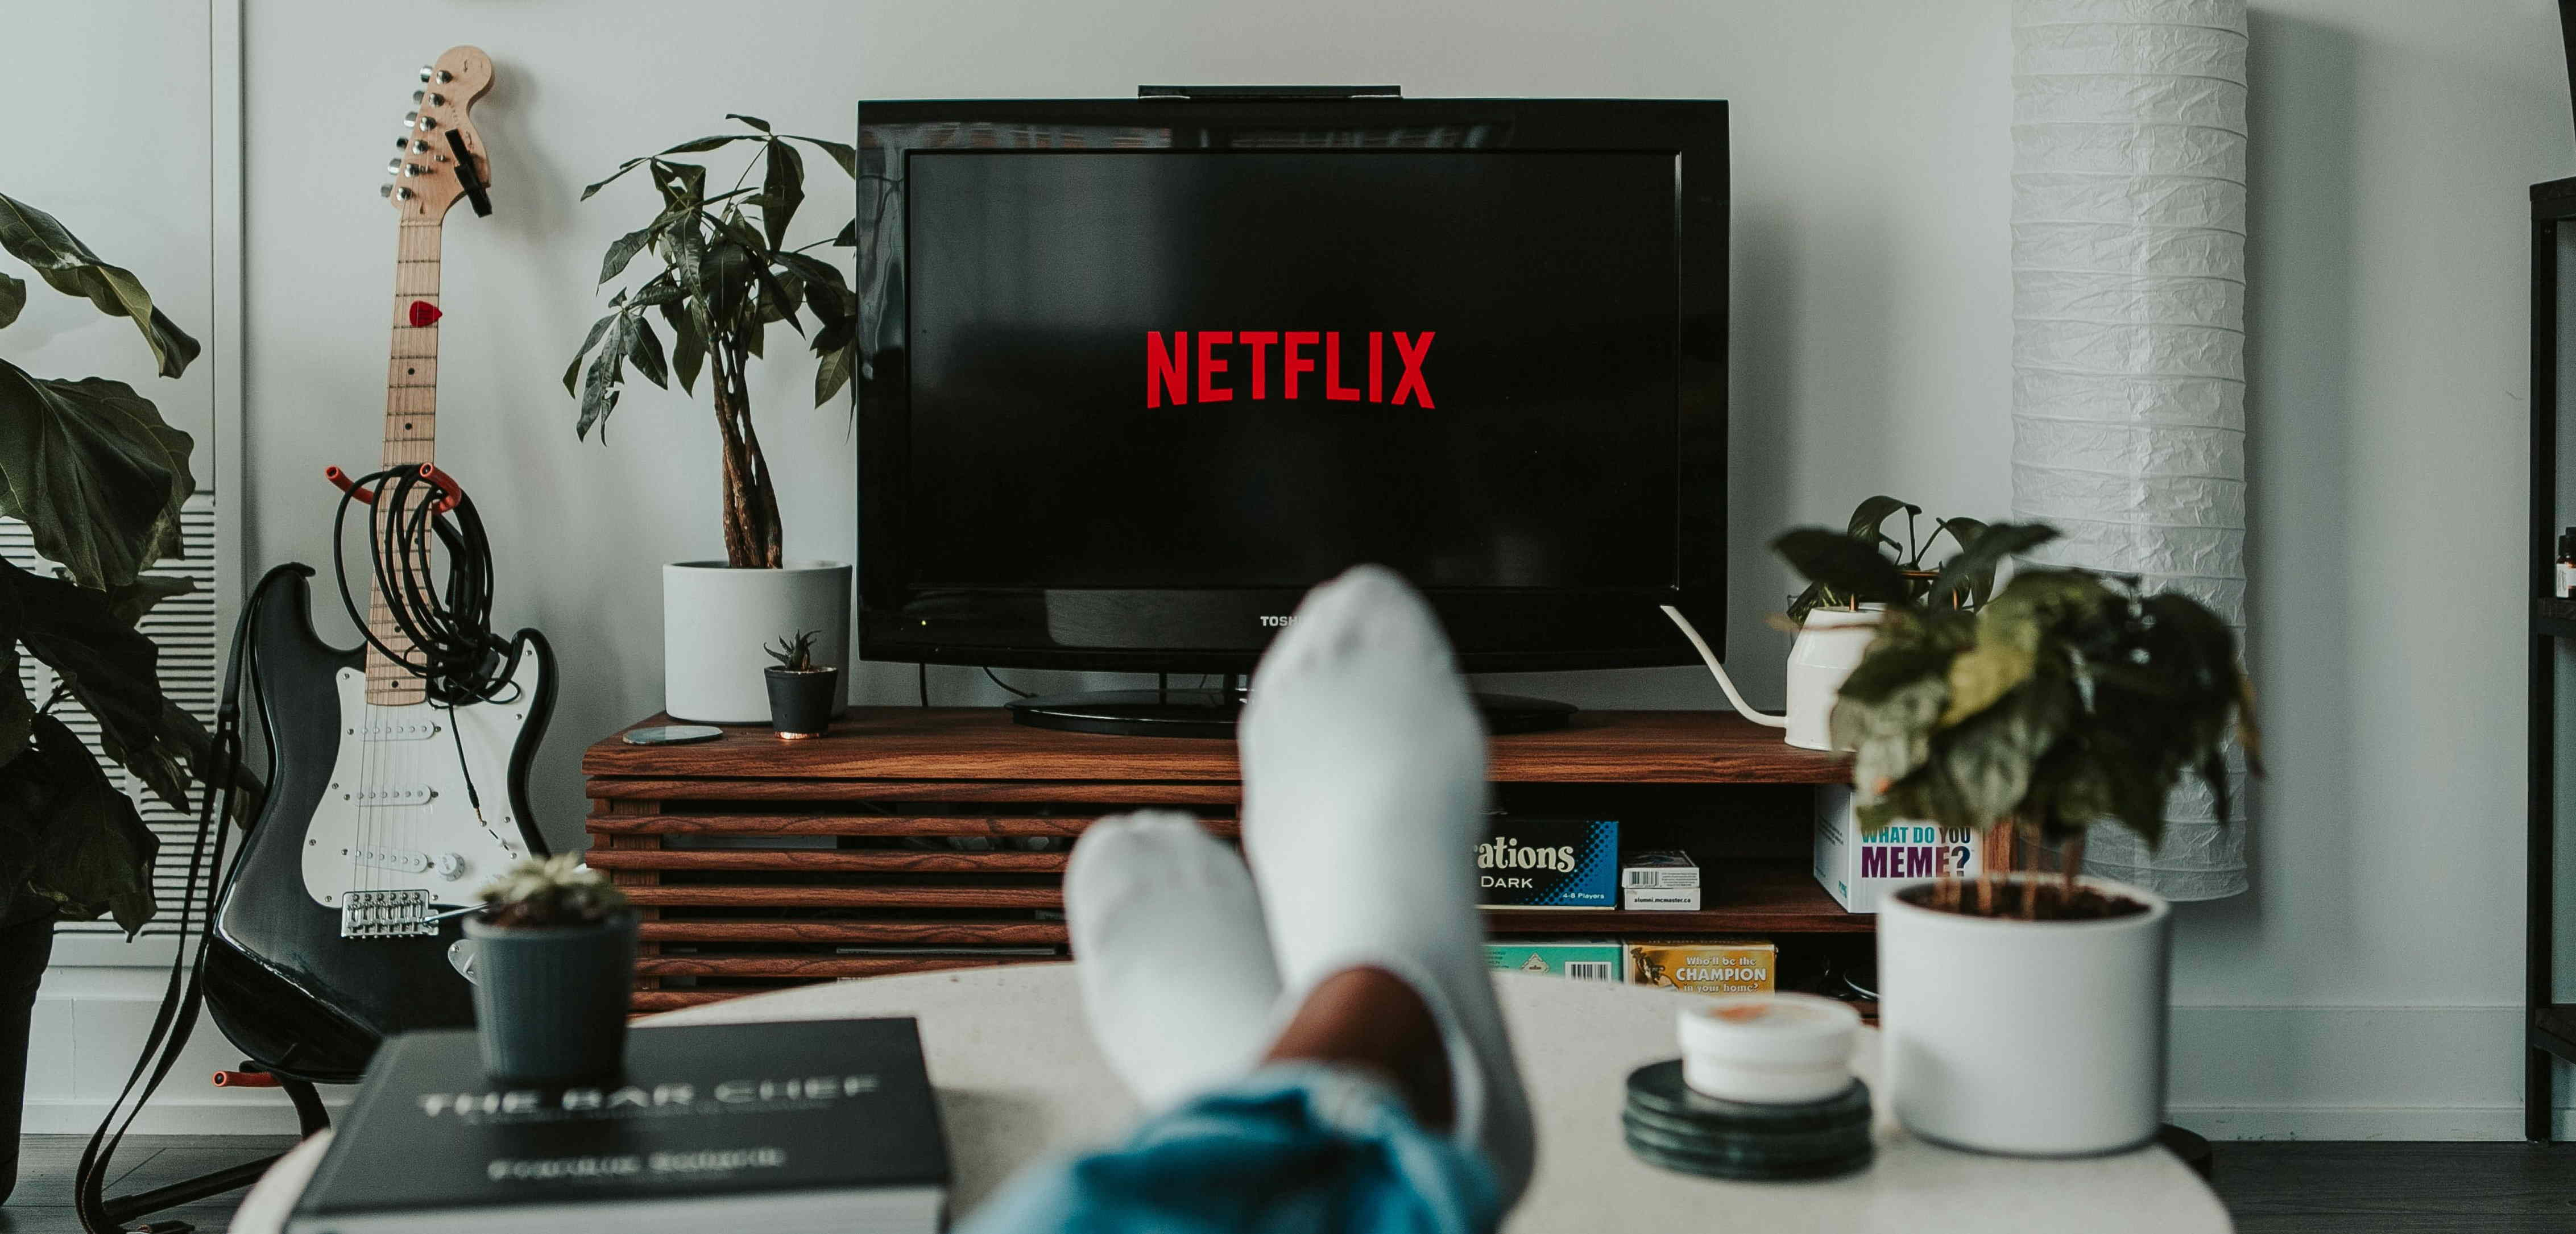

### 1. Importing Required Libraries & Loading the Datasets

In [1]:
#DataFrame Manipulation
import pandas as pd

#Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("datasets/netflix_data.csv")
durations_df = pd.read_csv("datasets/durations.csv")

# Print the first five rows of the DataFrame
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


#### 1.1. A Quick Inspection

In [3]:
#A quick inspection of the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


___
All seems intact except that some movies do not have details of cast, director, and country.
    
The first movie shown in the dataframe above has a very short duration. We observe that the movie type is "TV Show". Let us see how many movie type there are in the dataset and the span(release_years) the dataset covers.

#### 1.2. Movie Genres that Dominate NEFLIX videos

In [4]:
#We will see the 10 most broadcasted genres on NETFLIX
netflix_df.groupby('genre')['genre'].count().sort_values(ascending=False).head(10)

genre
Dramas              1384
Comedies            1074
Documentaries        751
Action               721
International TV     690
Children             502
Crime TV             369
Kids                 359
Stand-Up             354
Horror Movies        244
Name: genre, dtype: int64

___
* Intersting to see that we have more drama than horror 🙂

#### 1.3. What are the types of Videos shown on NETFLIX?

In [5]:
#Types of movies shown on NETFLIX
print('Types of videos shown on NETFLIX')
display(netflix_df['type'].value_counts())


#Get the earliest and latest years
earliest_year = netflix_df['release_year'].min()
latest_year = netflix_df['release_year'].max()
print('\n\n', f'The release_years of movies recorded in this dataset span between {earliest_year} and {latest_year}')

Types of videos shown on NETFLIX


Movie      5377
TV Show    2410
Name: type, dtype: int64



 The release_years of movies recorded in this dataset span between 1925 and 2021


### 2. What if the TV_shows are usually very short? 🤔

____
* We will split the main dataframe into two sets containing TV_shows and Movies to fetch the average duration per year.

In [6]:
#Create different dataframes for NETFLIX TV Shows and Movies
netflix_shows = netflix_df[netflix_df['type']=='TV Show']
netflix_movies = netflix_df[netflix_df['type']=='Movie']

#Inspect
netflix_movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action


### 3. What is the Average yearly duration ⌛ of Movies by year of release

In [7]:
#We will inspect only for the last 15 years
netflix_movies.groupby('release_year')['duration'].mean().tail(10)

release_year
2012    100.620253
2013     98.752475
2014    100.266393
2015     99.827225
2016     95.112150
2017     94.836022
2018     96.170300
2019     93.457045
2020     89.795620
2021     80.166667
Name: duration, dtype: float64

### 4. A visual inspection of Movie Durations over the the last 15 years
<p>A great place to start will be a visualization of the data.</p>

<p>Given that the data is continuous, a line plot would be a good choice, with the dates represented along the x-axis and the average length in minutes along the y-axis. This will allow us to easily spot any trends in movie durations.
<p><em>

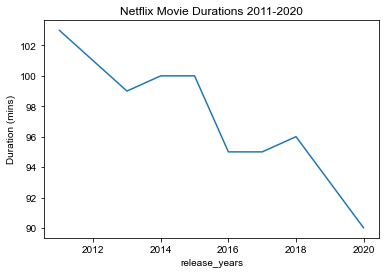

In [8]:
#Create Axis figures and set chart theme
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

# Draw a line plot of release_years and durations
plt.plot(durations_df["years"], durations_df["durations"])
#durations_df.plot(x="release_year", y="duration", kind="line")
ax.set_ylabel("Duration (mins)")
ax.set_xlabel("release_years")
# Create a title
ax.set_title("Netflix Movie Durations 2011-2020")

# Show the plot
plt.show()

___
The The average NETFLIX movie these days do not really exceed 90mins.

There are a few questions about this trend that we should look to answer, including:</p>
<ol>
<li>What does this trend look like over a longer period of time?</li>
<li>Is this explainable by something like the genre of entertainment?</li>
    
Let us further trim down the datframe by removing possibly distracting columns so that <code>netflix_movies</code> containing only <code>title</code>, <code>country</code>, <code>genre</code>, <code>release_year</code>, and <code>duration</code>.</p>

In [9]:
# Select only the columns of interest
netflix_movies_col_subset = netflix_movies[["title", "country", "genre", "release_year", "duration"]]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


### 5. Create a Scatter Plot

<p>This time, we are no longer working with aggregates but instead with individual movies. A line plot is no longer a good choice for our data, so let's try a scatter plot instead. We will again plot the year of release on the x-axis and the movie duration on the y-axis.</p>

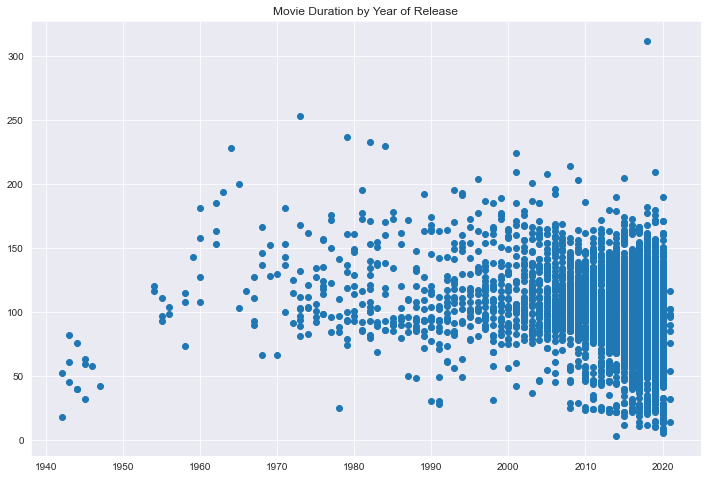

In [10]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"])

# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

___
We can see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.Upon further inspection, something else is going on. Some of these films are under an hour long! 

Let's filter our DataFrame for movies with a duration under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.

### 6. Movie Duration & Genres - Is there a relationship? 🤔

#### 6.1. What are the Genre Classifications?

In [11]:
list(netflix_movies_col_subset['genre'].unique())

['Dramas',
 'Horror Movies',
 'Action',
 'Documentaries',
 'Independent Movies',
 'Comedies',
 'Sports Movies',
 'Uncategorized',
 'International Movies',
 'Sci-Fi',
 'Children',
 'Classic Movies',
 'Thrillers',
 'Stand-Up',
 'Anime Features',
 'Music',
 'Cult Movies',
 'Romantic Movies',
 'LGBTQ Movies']

In [12]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset["duration"] < 60]

# Print the first 20 rows of short_movies
short_movies[0:20]

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


#### 6.2. Marking non-feature films
<p>Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster. </p>
<p>We could eliminate these rows from our DataFrame and plot the values again. But another interesting way to explore the effect of these genres on our data would be to plot them, but mark them with a different color.</p>

In [13]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for index, row in netflix_movies_col_subset.iterrows() :
    if row["genre"] == "Children":
        colors.append("red")
    elif row["genre"] == "Documentaries":
        colors.append("blue")
    elif row["genre"] == "Stand-Up":
        colors.append("green")
    else:
        colors.append("black")
        
# Inspect the first 10 values in your list        
print(colors[0:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


#### 6.3. Plotting The Colours

<p>We now have a <code>colors</code> list that we can pass to our scatter plot, which should allow us to visually inspect whether these genres might be responsible for the decline in the average duration of movies.</p>

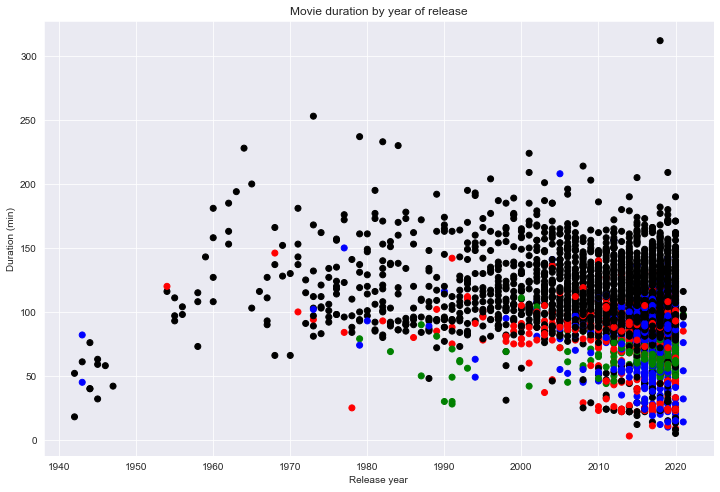

In [14]:
# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"], color = colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

<p>As we suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. But we can't know for certain until we perform additional analyses. </p>

#### 6.4. Try Aggregating Duration by Genre to inspect further - A Chart is cool too 😎

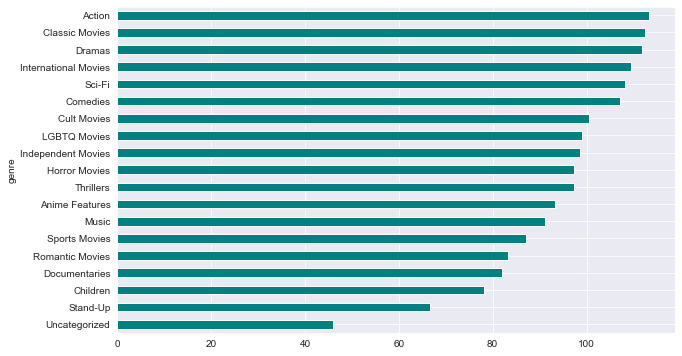

In [15]:
#Pandas inbuilt plot function after setting size
fig = plt.figure(figsize=(10,6))
netflix_movies_col_subset.groupby('genre')['duration'].mean().sort_values().plot(kind='barh', color='teal');

In [16]:
#The maximum duration of TV Shows on NETFLIX
print(f'The maximum duration of NETFLIX TV shows here is {netflix_shows["duration"].max()} mins')

The maximum duration of NETFLIX shows here is 16 mins
